In [1]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Step 2: Load and preprocess Titanic dataset (same as Task 5)
titanic = sns.load_dataset('titanic')
titanic = titanic.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'])
titanic = titanic.dropna()

In [3]:
# Encode categorical variables
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [4]:
# Features and target
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic['survived']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Track accuracies
train_accuracies = []
test_accuracies = []
depths = range(1, 21)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

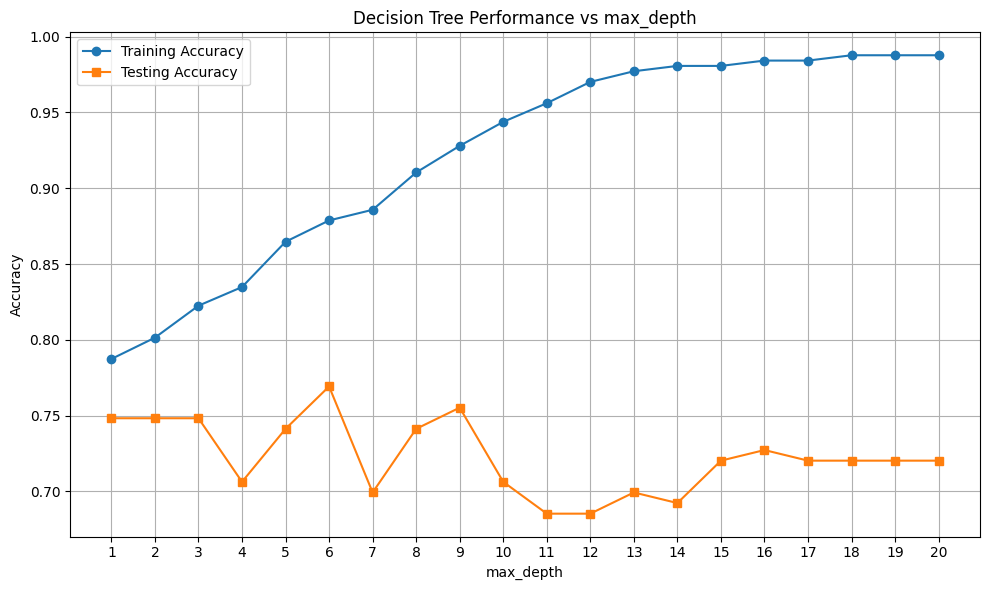

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(depths, test_accuracies, label="Testing Accuracy", marker='s')
plt.title("Decision Tree Performance vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Vary min_samples_split
splits = range(2, 21)
train_accs = []
test_accs = []

for split in splits:
    model = DecisionTreeClassifier(max_depth=5, min_samples_split=split, random_state=42)
    model.fit(X_train, y_train)
    train_accs.append(accuracy_score(y_train, model.predict(X_train)))
    test_accs.append(accuracy_score(y_test, model.predict(X_test)))

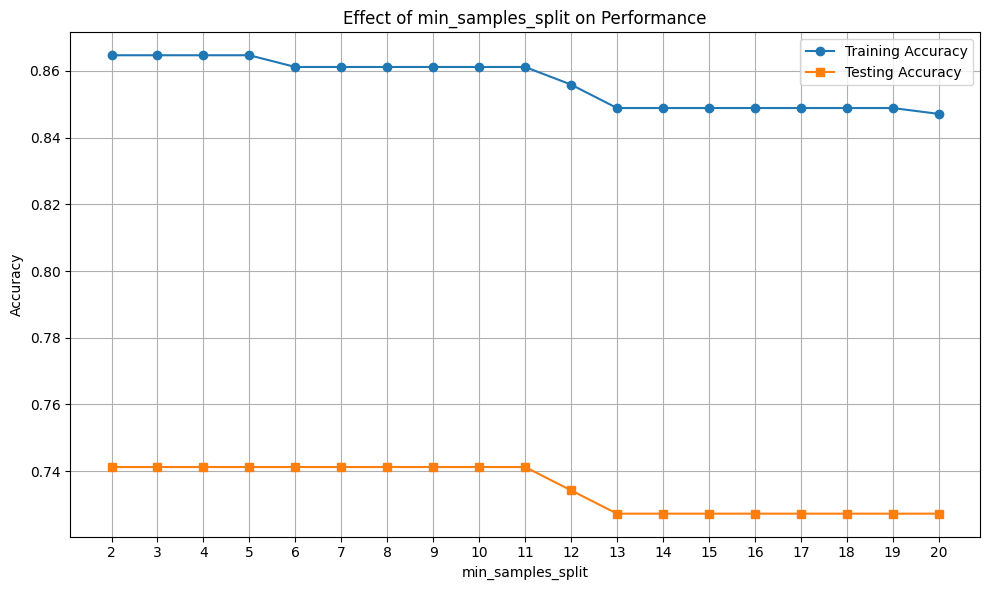

In [9]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(splits, train_accs, label="Training Accuracy", marker='o')
plt.plot(splits, test_accs, label="Testing Accuracy", marker='s')
plt.title("Effect of min_samples_split on Performance")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.xticks(splits)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Overfitting is shown when training accuracy stays high but testing accuracy drops as max_depth increases.

Tuning max_depth and min_samples_split helps balance bias-variance.

Task 7: Conceptual Questions 
Answer: 
1. What is the difference between Bagging and Boosting? 

2. How does Random Forest reduce variance? 

3. What is the weakness of boosting-based methods? 

1. What is the difference between Bagging and Boosting?

   Bagging (Bootstrap Aggregating) builds multiple independent models (usually in parallel) on random subsets of the data and averages their predictions to reduce variance.

   Boosting builds models sequentially, where each new model focuses on correcting the errors made by the previous ones, aiming to reduce bias.


2. How does Random Forest reduce variance?
   Random Forest is an ensemble of decision trees created using bootstrapped samples and random feature selection. By combining many uncorrelated trees and averaging their outputs, it reduces overfitting and variance, leading to more stable and accurate predictions.


3. What is the weakness of boosting-based methods?
   Boosting can be prone to overfitting, especially if the model is too complex or the data has noise. It is also computationally intensive, as it builds models sequentially, and may be less interpretable compared to simpler models.